In [1]:
import pandas as pd

# Importing the dataset using pandas module
dataset = pd.read_csv('Iris.csv')

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
dataset.drop('Id', axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = dataset.drop('Species', axis = 1)
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
X = dataset.drop('Species', axis=1)
y = dataset['Species']

In [6]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split
# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

### Training And Testing Decision Tree Algorithm


In [7]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,119,7.7,2.6,6.9,2.3
18,19,5.7,3.8,1.7,0.3
4,5,5.0,3.6,1.4,0.2
45,46,4.8,3.0,1.4,0.3
59,60,5.2,2.7,3.9,1.4
...,...,...,...,...,...
133,134,6.3,2.8,5.1,1.5
137,138,6.4,3.1,5.5,1.8
72,73,6.3,2.5,4.9,1.5
140,141,6.7,3.1,5.6,2.4


In [9]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)

# testing part
X_test = sc.transform(X_test)

The fit() method helps in fitting the data into a model, transform() method helps in transforming the data into a form that is more suitable for the model. Fit_transform() method, on the other hand, combines the functionalities of both fit() and transform() methods in one step.


In [29]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
# entropy means information gain
classifer = DecisionTreeClassifier(criterion='gini')
# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier()

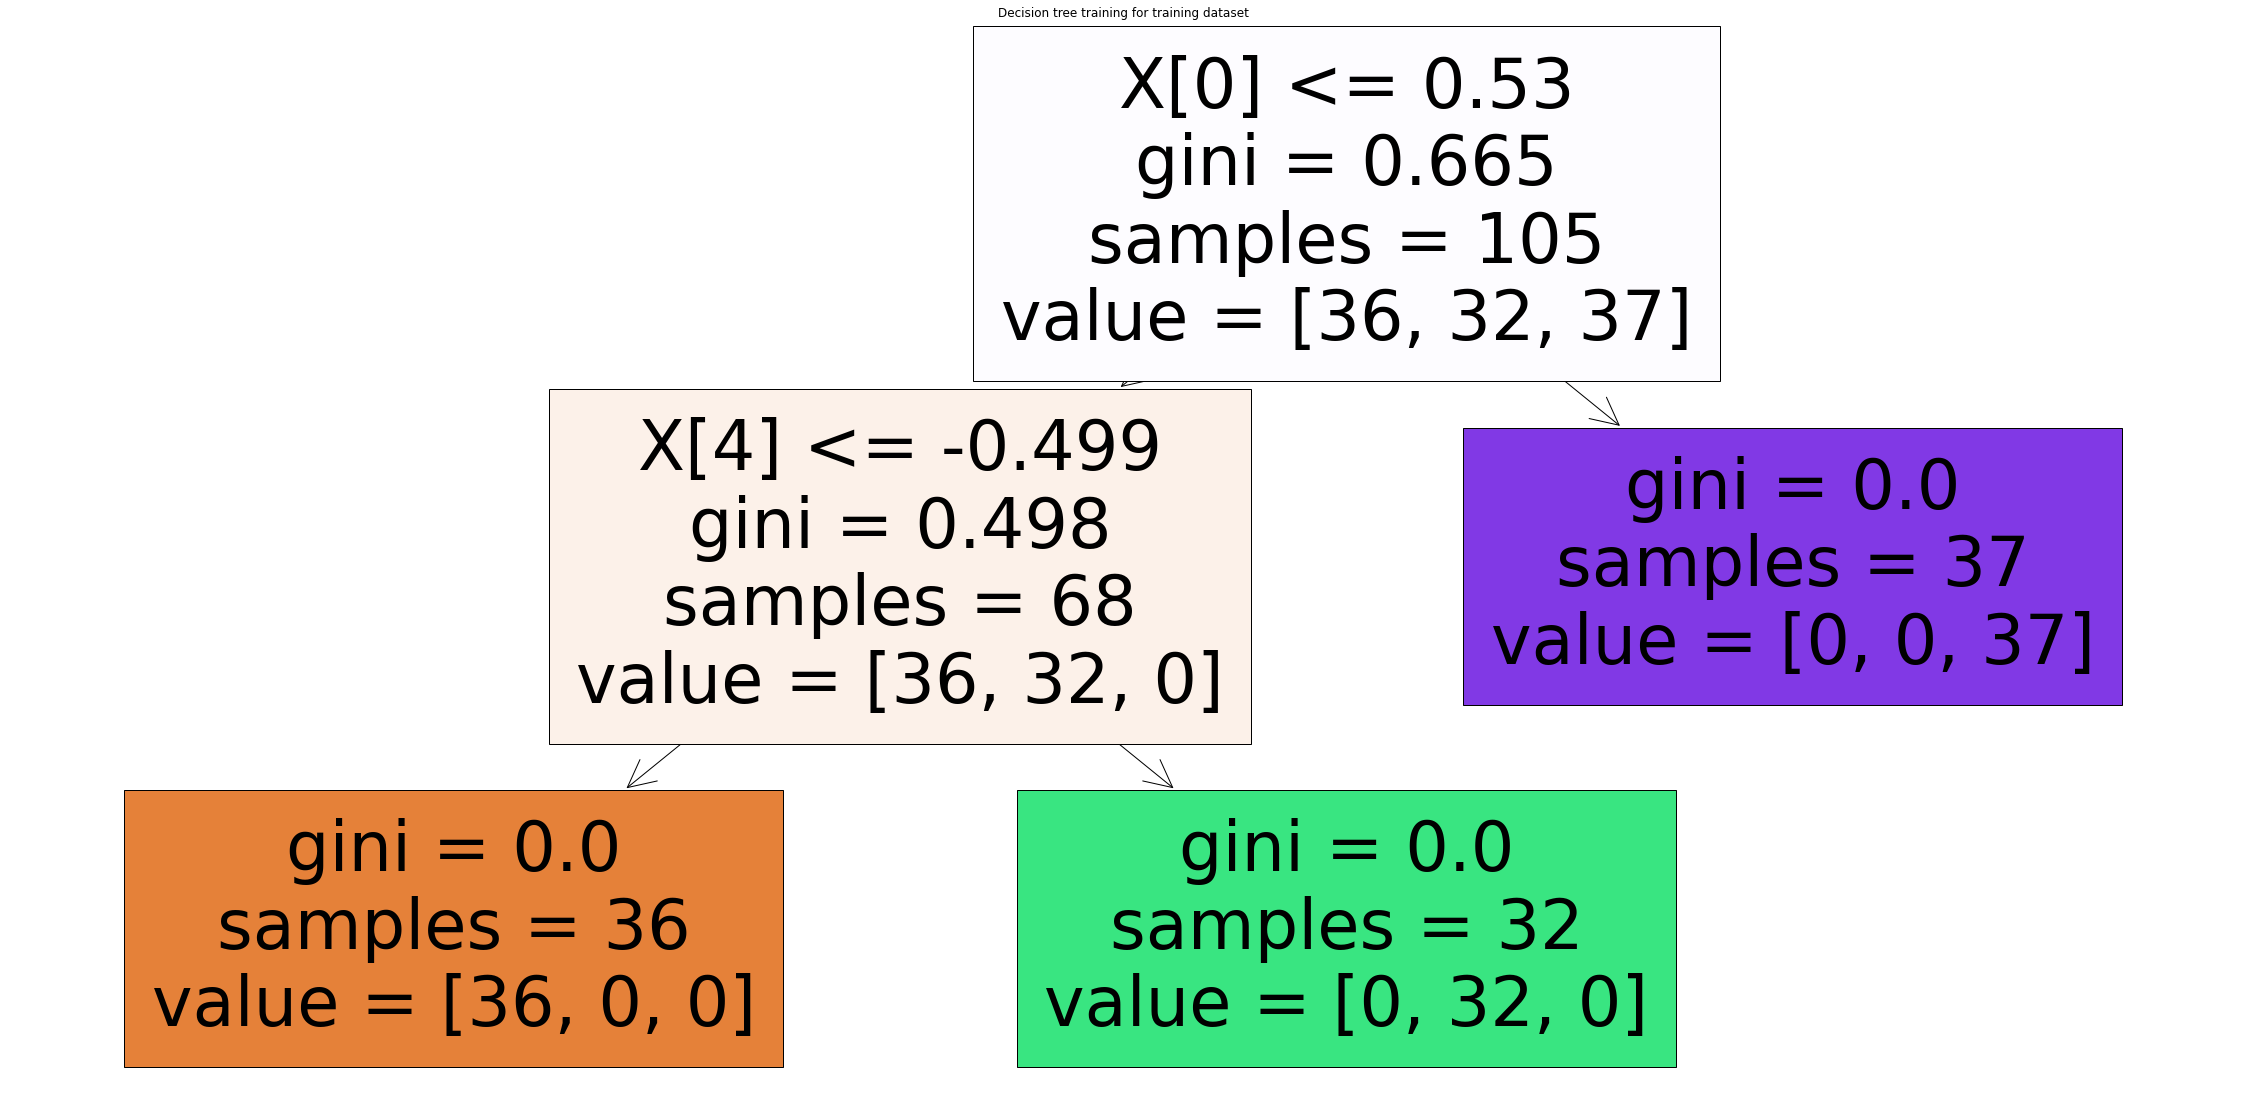

In [30]:
# importing the plot tree method
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# output size of decision tree
plt.figure(figsize=(40,20))
plot_tree(classifer, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

In [31]:
# importing the tree
from sklearn import tree
# text based tree
text_representation = tree.export_text(classifer)

print(text_representation)

|--- feature_0 <= 0.53
|   |--- feature_4 <= -0.50
|   |   |--- class: Iris-setosa
|   |--- feature_4 >  -0.50
|   |   |--- class: Iris-versicolor
|--- feature_0 >  0.53
|   |--- class: Iris-virginica



### Evaluation of the decision trees

In [32]:
y_pred = classifer.predict(X_test)

<AxesSubplot:>

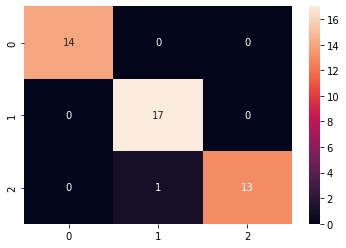

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
# Making the Confusion Matrix

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)

In [34]:
from sklearn.metrics import accuracy_score
# accuracy
accuracy_score(y_pred,y_test)

0.9777777777777777

### Decision Trees on Regression Dataset

In [38]:
dataset = pd.read_csv('BTC-USD.csv')

In [39]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
1,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2,2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792
3,2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063,41441.164063,19652846215
4,2022-02-06,41441.121094,42500.785156,41244.906250,42412.433594,42412.433594,16142097334


In [40]:
dataset.drop("Date", axis=1, inplace=True)

In [41]:
X = dataset.drop('Volume', axis=1)
y = dataset['Volume']

In [49]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split
# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [50]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeRegressor
# entropy means information gain
regressor = DecisionTreeRegressor()
# providing the training dataset
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

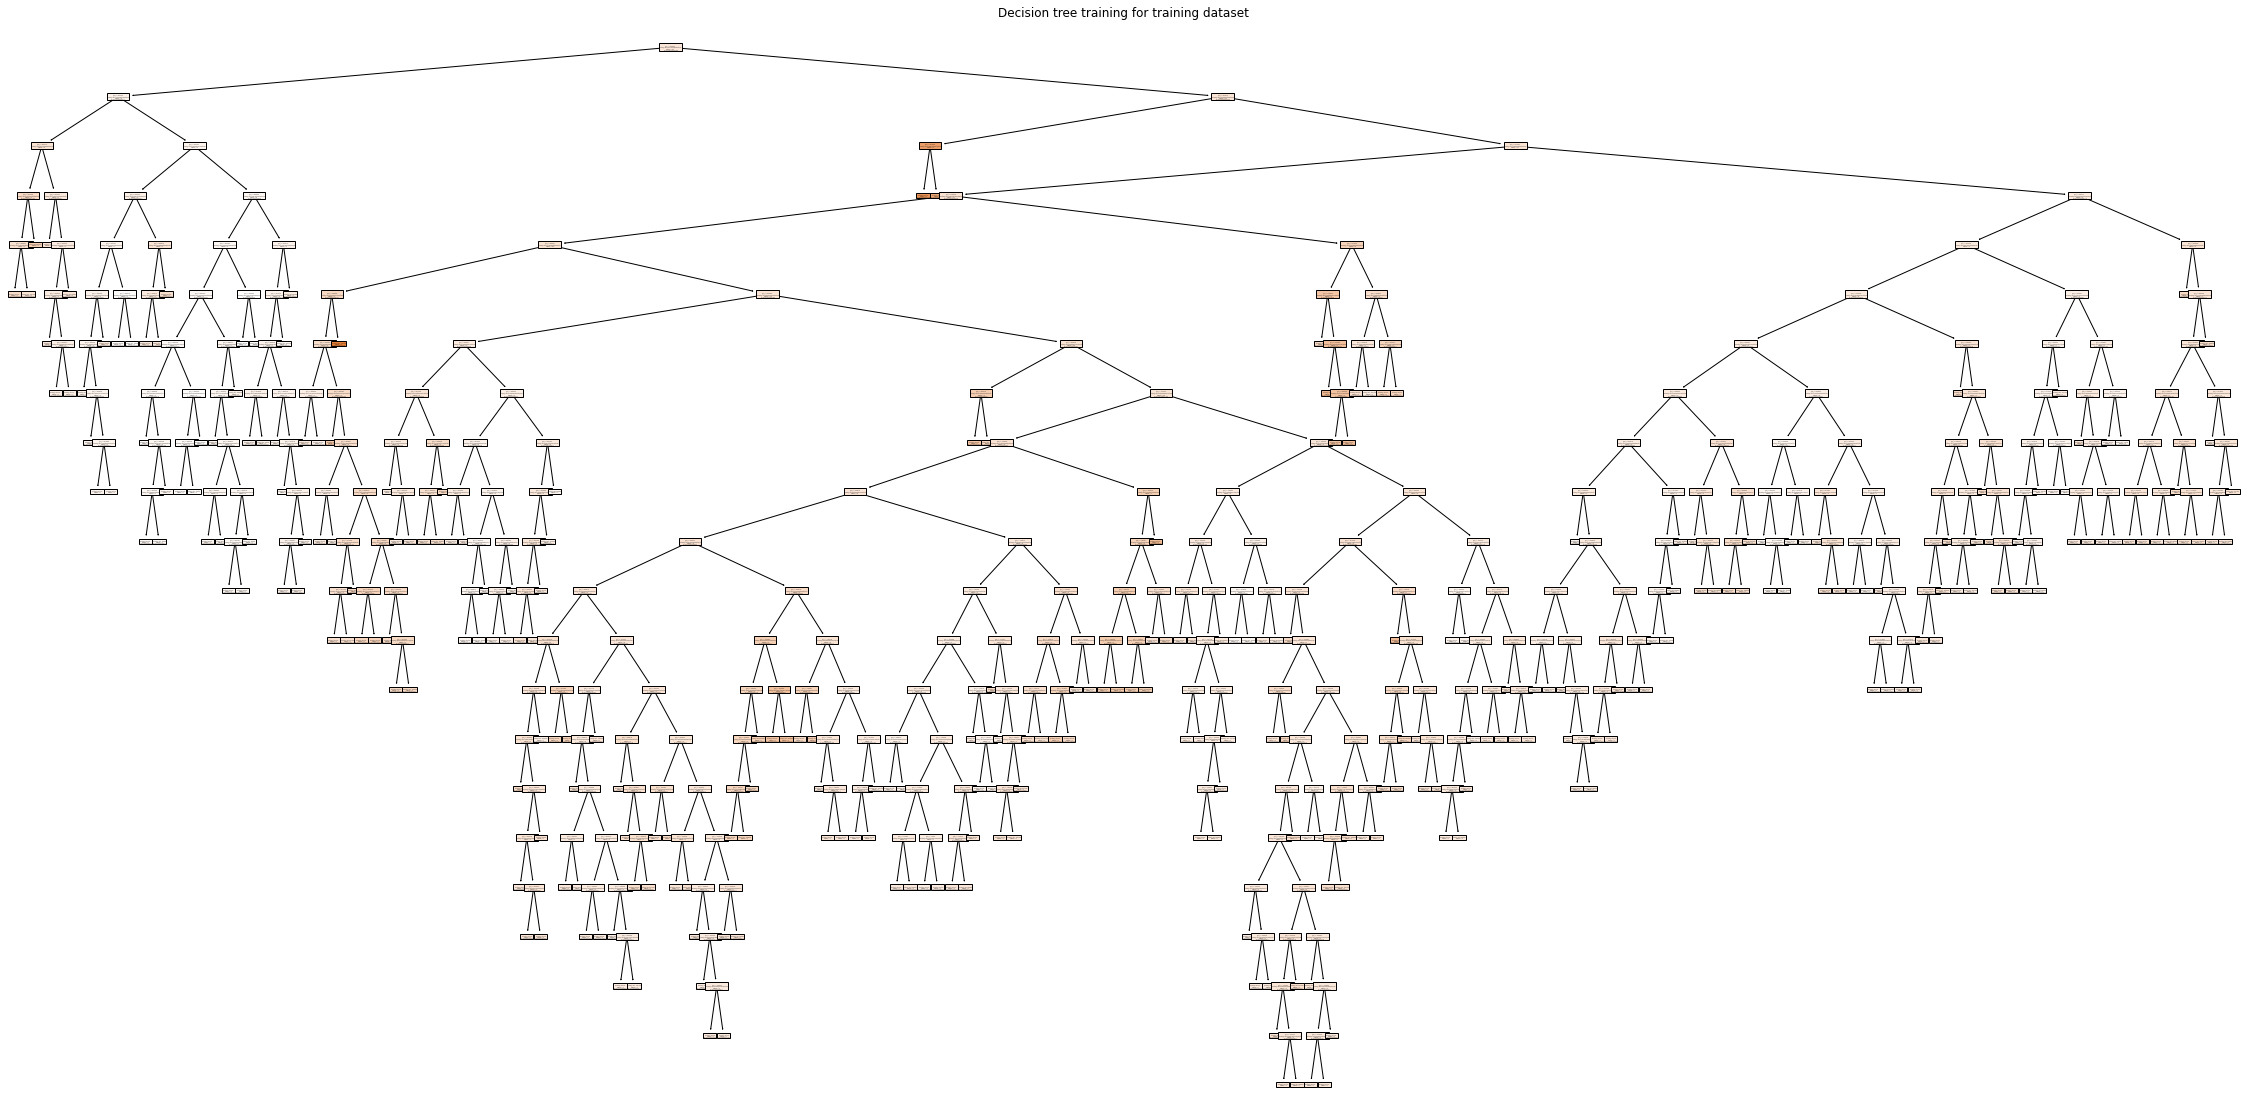

In [51]:
# # importing the plot tree method
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# # output size of decision tree
# plt.figure(figsize=(40,20))
# plot_tree(regressor, filled=True)
# plt.title("Decision tree training for training dataset")
# plt.show()

In [52]:
# importing the tree
from sklearn import tree
# text based tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_1 <= 17578.23
|   |--- feature_0 <= 16454.68
|   |   |--- feature_2 <= 15963.74
|   |   |   |--- feature_3 <= 16403.98
|   |   |   |   |--- feature_4 <= 15988.53
|   |   |   |   |   |--- value: [37429485518.00]
|   |   |   |   |--- feature_4 >  15988.53
|   |   |   |   |   |--- value: [30726828760.00]
|   |   |   |--- feature_3 >  16403.98
|   |   |   |   |--- value: [49630243054.00]
|   |   |--- feature_2 >  15963.74
|   |   |   |--- feature_0 <= 16206.61
|   |   |   |   |--- value: [32958875628.00]
|   |   |   |--- feature_0 >  16206.61
|   |   |   |   |--- feature_3 <= 17037.44
|   |   |   |   |   |--- feature_2 <= 16096.96
|   |   |   |   |   |   |--- value: [27743025156.00]
|   |   |   |   |   |--- feature_2 >  16096.96
|   |   |   |   |   |   |--- feature_3 <= 16675.64
|   |   |   |   |   |   |   |--- value: [23581685468.00]
|   |   |   |   |   |   |--- feature_3 >  16675.64
|   |   |   |   |   |   |   |--- value: [22722096615.00]
|   |   |   |   |--- feature_3 >  17

### Evalaution of the Regression Tree

In [53]:
# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)

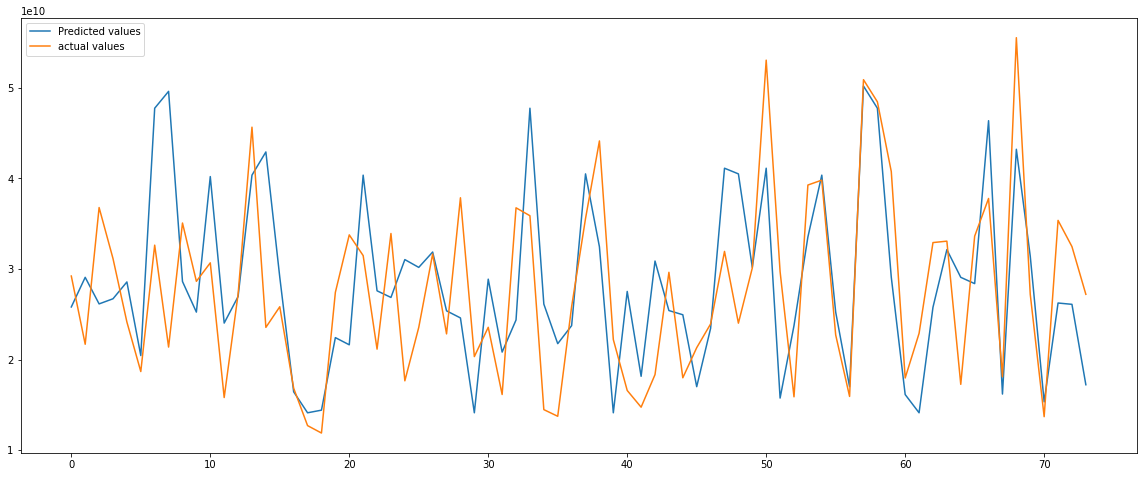

In [54]:
# importing the module
import matplotlib.pyplot as plt
# fitting the size of the plot
plt.figure(figsize=(20, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.legend()
plt.show()

In [55]:
# Importing r2 
from sklearn.metrics import r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_pred, y_test))

R-square score is : 0.19003394464540624
